In [2]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

## Load and Examine the data

In [3]:
data = pd.read_csv("../data/1_set.csv")

In [4]:
data

,tweet,hate,offensive,ok
0,!!! RT @mayasolovely: As a woman you shouldn't...,0,0,1
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0,1,0
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0,1,0
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0,1,0
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,0,1,0
...,...,...,...,...
40954,@scaryjen @Alfuriuskj @Nayadrikj undead 4ever.,0,0,1
40955,Here's a suggestion,0,0,1
40956,@ardiem1m @Alfonso_AraujoG @MaxBlumenthal @old...,0,0,1
40957,Oh I knew it. Fuuuck. More restaurants. Ok I s...,0,0,1


In [5]:
data.sample(5)

,tweet,hate,offensive,ok
12763,Many people claiming slippery slope is now abs...,0,0,1
32406,RT @FLOSSWeekly: Just added to the schedule fo...,0,0,1
4758,@StephyRae7 faggot.,1,1,0
13621,"On my own shit, jus turned 18 bitches on dat ""...",0,1,0
15144,RT @FLHippie: If a guy ever called me names su...,0,1,0


In [6]:
cols_target = ['hate', 'offensive', 'ok']

In [7]:
data.describe()

,hate,offensive,ok
count,40959.000000,40959.000000,40959.000000
mean,0.119144,0.587661,0.496570
std,0.323961,0.492262,0.499994
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [8]:
data['tweet'].isnull().sum()

0

In [9]:
print(data[cols_target].sum())

hate          4880
offensive    24070
ok           20339
dtype: int64


length of the text in the tweets:

In [10]:
data['text_length'] = data['tweet'].apply(lambda x:len(str(x)))

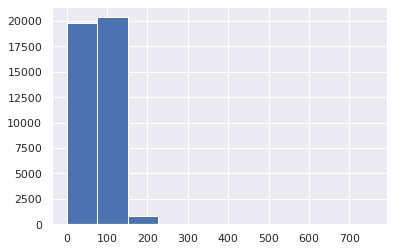

In [11]:
#histogram plot for text length
sns.set()
data['text_length'].hist()
plt.show()

Most of the text is less than 300 chars

Checking what is going on with the data:

In [12]:
all_words = []
for tweet in data['tweet']:
    for word in tweet.split():
        all_words.append(word)
        
def word_freq(list):
    """getting the freq of words
    input: a list of words
    output: dict with items of the list as key and
    their freq in the list as the value"""
    words_dict = {}
    for word in list:
        words_dict[word] = words_dict.get(word,0)+1
    return words_dict

sort_orders = sorted(word_freq(all_words).items(), key=lambda x:x[1], reverse=True)
for i in sort_orders[0:10]:
    print(i)

('a', 12583)
('the', 11613)
('RT', 10837)
('to', 9157)
('I', 9153)
('bitch', 6685)
('you', 6559)
('and', 6196)
('is', 5570)
('of', 5352)


# Cleaning up the text

In [13]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's","what is", text)
    text = re.sub(r"rt", '',text)
    text = re.sub(r"\'ve","have", text)
    text = re.sub(r"can't","cannot",text)
    text = re.sub(r"n't", "not", text)
    text = re.sub(r"i'm","i am", text)
    text = re.sub(r"\'re'","are", text)
    text = re.sub(r"\'d'","would",text)
    text = re.sub(r"\'ll'", "will", text)
    text = re.sub(r"\'scuse'", "excuse", text)
    text = re.sub("\W",' ', text)
    text = re.sub('\s+',' ',text)
    text = text.strip(' ')
    return text

import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [14]:
data['tweet'] = data['tweet'].map(lambda x: clean_text(x))

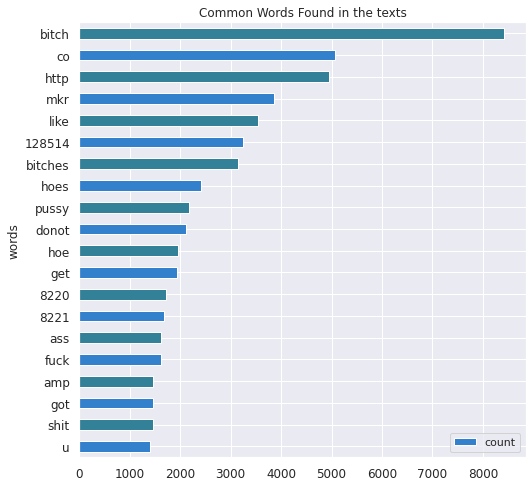

In [15]:
all_words = []
for tweet in data['tweet']:
    for word in tweet.split():
        all_words.append(word)
        
def word_freq(list):
    """getting the freq of words
    input: a list of words
    output: dict with items of the list as key and
    their freq in the list as the value"""
    words_dict = {}
    for word in list:
        words_dict[word] = words_dict.get(word,0)+1
    return words_dict
words_no_stop = [i for i in all_words if not i in stop_words]

sort_orders = sorted(word_freq(words_no_stop).items(), key=lambda x:x[1], reverse=True)

dataframe = pd.DataFrame(sort_orders[:20],
                        columns=['words','count'])
fig, ax = plt.subplots(figsize=(8,8))
dataframe.sort_values(by='count').plot.barh(x='words',
                                           y='count',
                                           ax=ax,
                                           color=[(0.2,0.5,0.8),(0.2,0.5,0.6)],
                                            fontsize=12)
ax.set_title('Common Words Found in the texts')
plt.show()

In [16]:
data['tweet']

0        mayasolovely as a woman you shouldnot complain...
1        mleew17 boy dats cold tyga dwn bad for cuffin ...
2        urkindofbrand dawg 80sbaby4life you ever fuck ...
3           c_g_anderson viva_based she look like a tranny
4        shenikarobes the shit you hear about me might ...
                               ...                        
40954           scaryjen alfuriuskj nayadrikj undead 4ever
40955                                  here s a suggestion
40956    ardiem1m alfonso_araujog maxblumenthal oldkhay...
40957    oh i knew it fuuuck more restaurants ok i said...
40958    kickyfast bonegolem totalbiscuit srhbutts nice...
Name: tweet, Length: 40959, dtype: object

In [17]:
data = data.drop('text_length', axis=1)
data.shape

(40959, 4)

In [18]:
X = data.tweet
Y = data.drop('tweet', axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
y_train, y_test['offensive']

(       hate  offensive  ok
 543       0          1   0
 10309     0          0   1
 7893      0          1   0
 36669     0          0   1
 13887     0          1   0
 ...     ...        ...  ..
 12348     0          1   0
 17780     0          1   0
 8103      0          1   0
 30092     0          0   1
 29339     1          1   1
 
 [32767 rows x 3 columns],
 37388    0
 26221    0
 33988    0
 23629    1
 25954    1
         ..
 19697    1
 8599     0
 19082    1
 40143    0
 26833    1
 Name: offensive, Length: 8192, dtype: int64)

## Vectorization

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=400, stop_words = 'english')
vect

TfidfVectorizer(max_features=400, stop_words='english')

In [20]:
X_dtm = vect.fit_transform(x_train)
X_dtm_test = vect.fit_transform(x_test)
X_dtm


<32767x400 sparse matrix of type '<class 'numpy.float64'>'
	with 110394 stored elements in Compressed Sparse Row format>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg =LogisticRegression(tol = 0.01,C=1.0, max_iter=10000)

for label in cols_target:
    print('...Processing {}'.format(label))
    y = y_train[label]
    logreg.fit(X_dtm,y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    
    y_test_2 = y_test[label]
    logreg.fit(X_dtm_test,y_test_2)
    y_pred_X_test = logreg.predict(X_dtm_test)
    print('Testing accuracy is {}'.format(accuracy_score(y_test_2, y_pred_X_test)))

...Processing hate
Training accuracy is 0.8963286233100375
Testing accuracy is 0.901123046875
...Processing offensive
Training accuracy is 0.89120151371807
Testing accuracy is 0.89404296875
...Processing ok
Training accuracy is 0.9545274208807641
Testing accuracy is 0.9520263671875


In [22]:
def add_feature(X, feature_to_add):
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [23]:
for label in cols_target:
    
    print('...Processing {}'.format(label))
    y = y_train[label]
    logreg.fit(X_dtm,y)
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    
    X_dtm = add_feature(X_dtm, y)
    print('TShape of X_dtm is now {}'.format(X_dtm.shape))
    
    y_test_2 = y_test[label]
    logreg.fit(X_dtm_test,y_test_2)
    y_pred_X_test = logreg.predict(X_dtm_test)
    print('Training accuracy is {}'.format(accuracy_score(y_test_2, y_pred_X_test)))
    
    X_dtm_test = add_feature(X_dtm_test, y_test_2)
    print('TShape of X_dtm_test is now {}'.format(X_dtm_test.shape))

...Processing hate
Training accuracy is 0.8963286233100375
TShape of X_dtm is now (32767, 401)
Training accuracy is 0.901123046875
TShape of X_dtm_test is now (8192, 401)
...Processing offensive
Training accuracy is 0.9644459364604633
TShape of X_dtm is now (32767, 402)
Training accuracy is 0.962646484375
TShape of X_dtm_test is now (8192, 402)
...Processing ok
Training accuracy is 0.9937742240668965
TShape of X_dtm is now (32767, 403)
Training accuracy is 0.992919921875
TShape of X_dtm_test is now (8192, 403)
